<a href="https://colab.research.google.com/github/DeepanshuThakur06/Machine-learning-project/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Deepanshu**

# **Project Summary -**

The objective of this project is to analyze the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a prominent bank in the Indian financial domain. The dataset used in this project consisted of monthly stock prices of Yes Bank since its inception, including closing, starting, highest, and lowest stock prices.

Overall, the project aimed to contribute to a better understanding of the relationship between the fraud case and Yes Bank's stock prices, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock


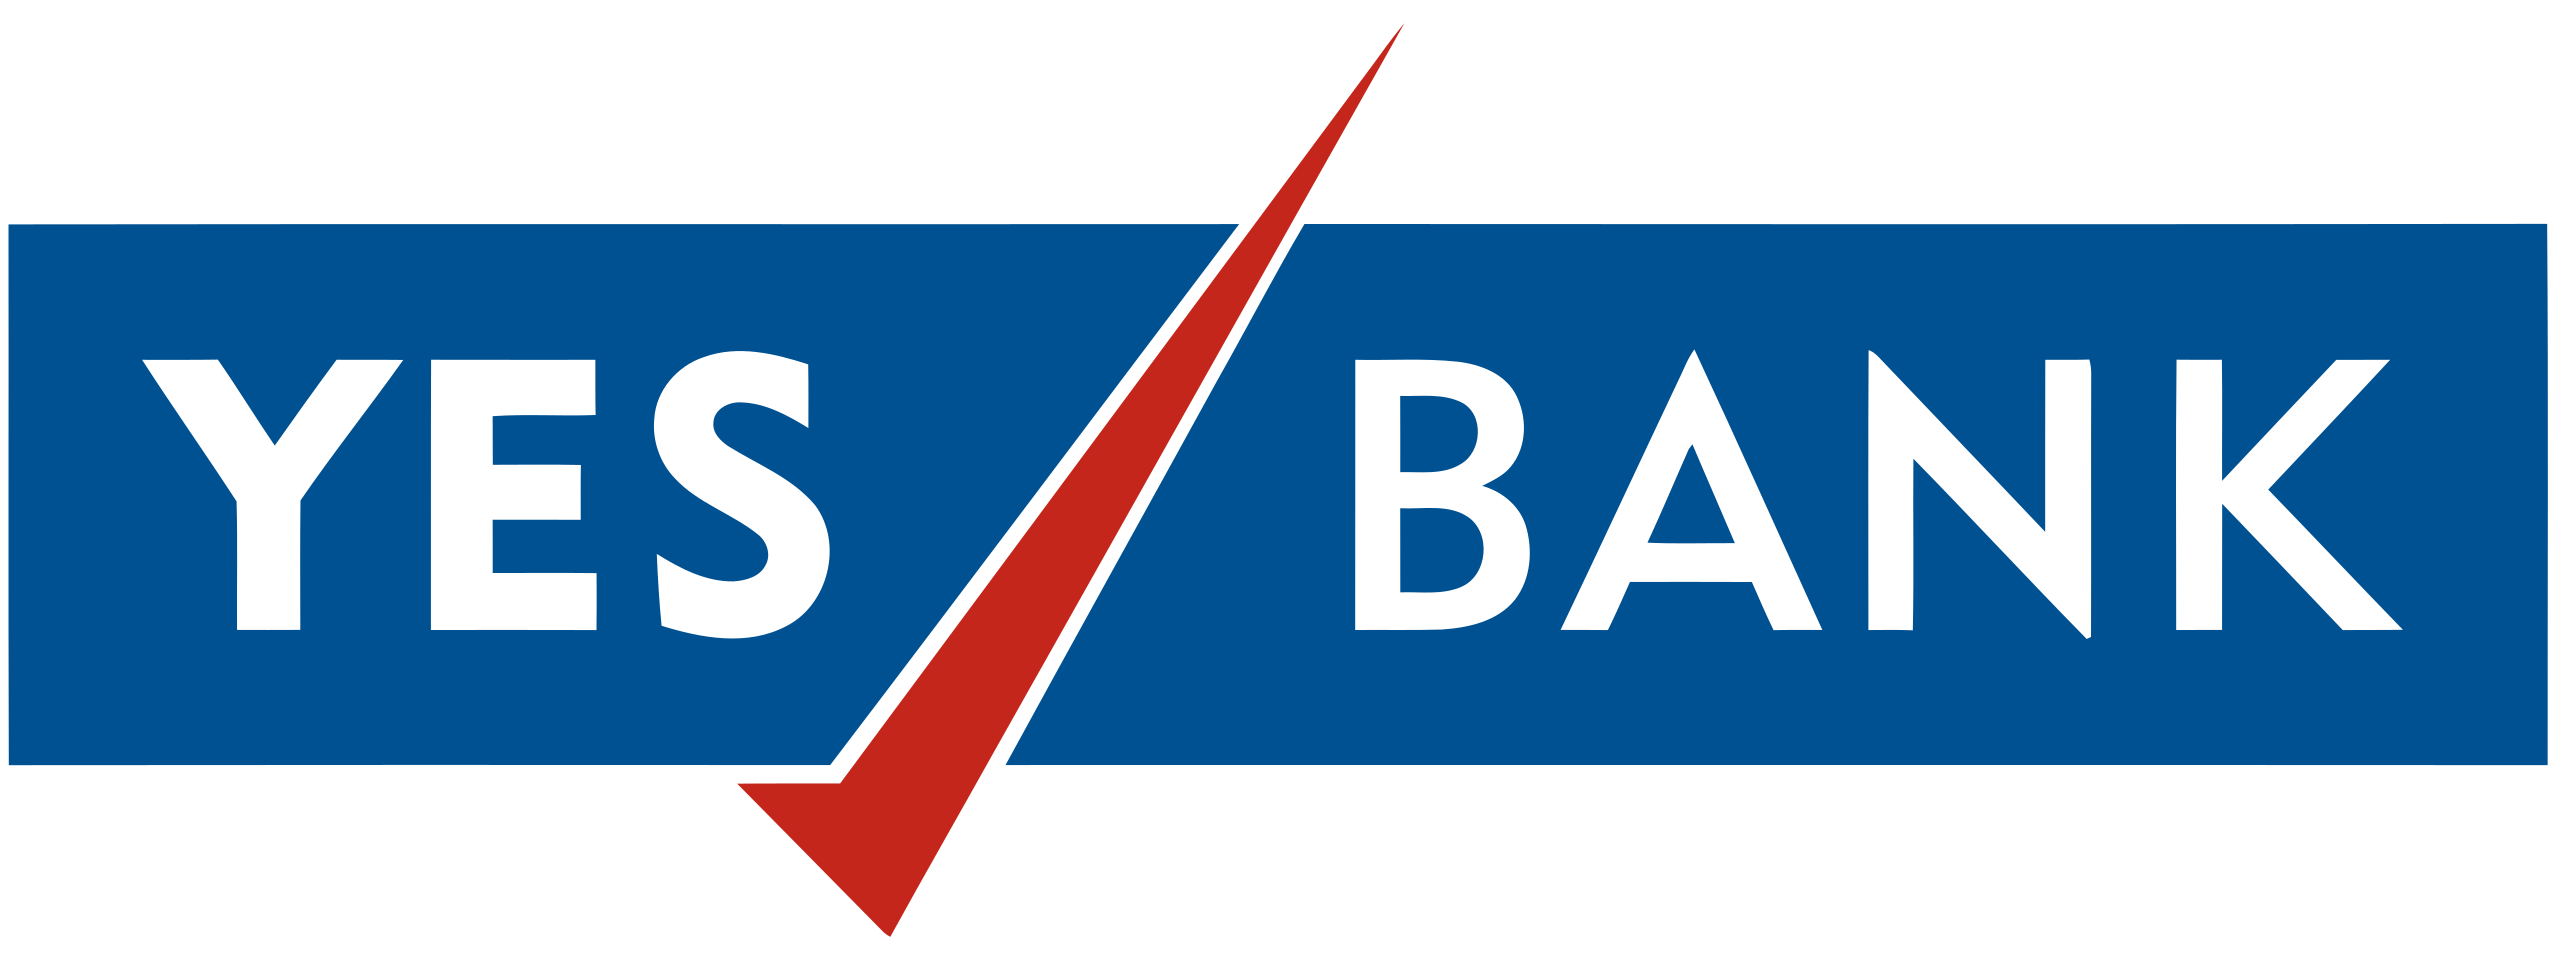

# **GitHub Link -**

https://github.com/DeepanshuThakur06/Machine-learning-project/tree/main

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print("No. of Rows count:",df.shape[0])
print("No. of columns count:",df.shape[1])

No. of Rows count: 185
No. of columns count: 5


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print("No. of duplicate value in dataset",df.duplicated().sum())

No. of duplicate value in dataset 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

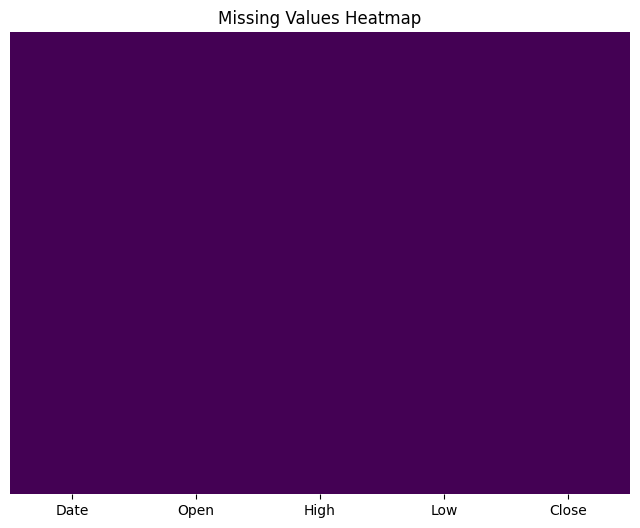

In [11]:
# Visualizing the missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

There are 185 rows and 5 columns.There are no duplicate values and no null/ missing values. In this dataset of Yes bank  Date column are object type and rest of all are float types.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


All mean are approximately same and standard deviation are also same approx.

### Variables Description

* **Date**- Date of records
* **Open**-Opening price
* **High**- highest price in a day
* **Low**- Lowest price in a day
* **Close**-Closing price



### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for Date: ['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14' 'May-14'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Month']=df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [16]:
df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


In [17]:
df.columns=df.columns.str.lower() ## all column in lower case to doing analysis in simple form


In [18]:
average_close_by_year = df.groupby('year')['close'].mean()
average_close_by_month = df.groupby('month')['close'].mean()


In [19]:
df['close_log'] = np.log1p(df['close'])

In [20]:
df.head()

,date,open,high,low,close,month,year,close_log
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005,2.599722
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005,2.668616
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005,2.660260
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005,2.638343
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005,2.667922


### What all manipulations have you done and insights you found?

I change the date to datetime using pandas to do time series analysis for for closing predictions. There are no missing values So, I Use the Same data for analysing.If there are having any outliers then i Will do this task in feature emgineering part, First i see the data using visulaizations. My output Value is Closing price so for doing the best distribution without any skewness,I use the logarithmic function for convert into Normal or Gaussian distribution.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 ( Distplot for Closing price )

<ipython-input-21-866b7a1267db>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['close'],color='r')


<Axes: xlabel='close', ylabel='Density'>

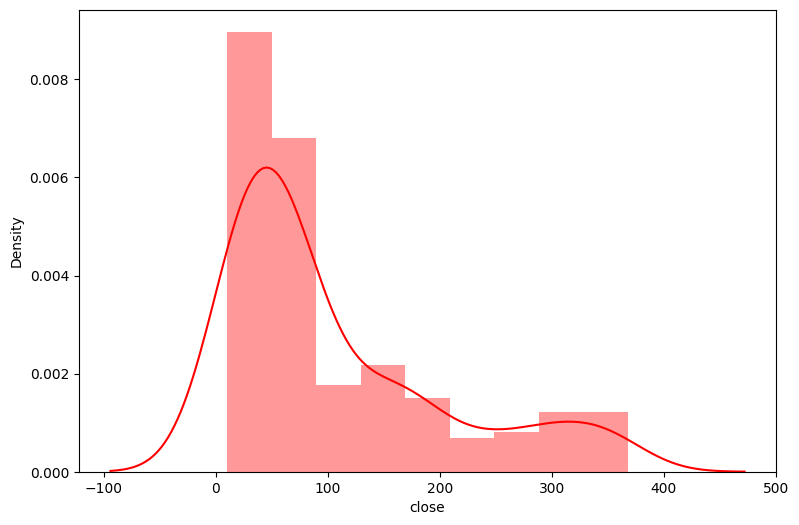

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(9,6))
sns.distplot(df['close'],color='r')

<ipython-input-22-53ae05bc09ec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['close_log'], color='r')


Text(0, 0.5, 'Density')

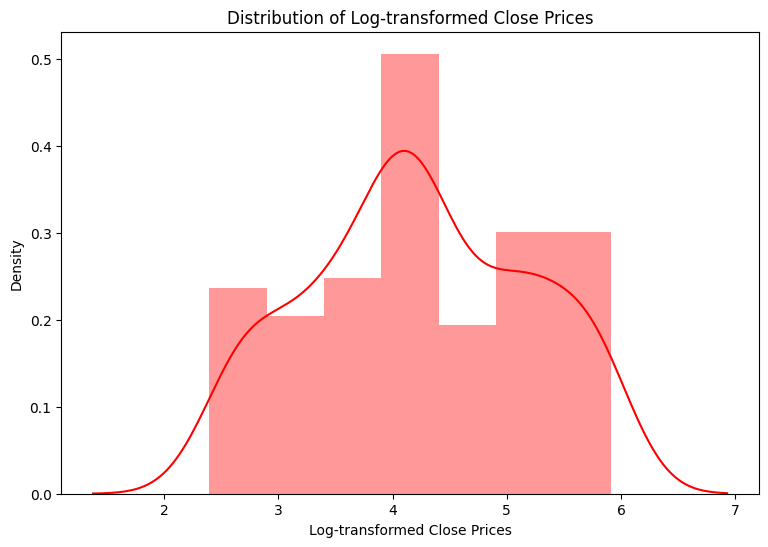

In [22]:
df['close_log'] = np.log1p(df['close'])

plt.figure(figsize=(9, 6))
sns.distplot(df['close_log'], color='r')

plt.title('Distribution of Log-transformed Close Prices')
plt.xlabel('Log-transformed Close Prices')
plt.ylabel('Density')

##### 1. Why did you pick the specific chart?

I chose KDE plot because :
* Provides a smooth estimate of the probability density function.
* Is flexible and can adapt to various distributions.
* Offers easy interpretation of the data's central tendency and variability.
* Combines histogram and KDE for informative visualization.
* Is conveniently available through Seaborn's distplot() function.

##### 2. What is/are the insight(s) found from the chart?

First I use the original column for closing price,then it is showing the slightly right skewed, So I use the logarithmic Close column then it is showing the Normal distribution.

#### Chart - 2 (scatter plot between 'High' and 'Low' )

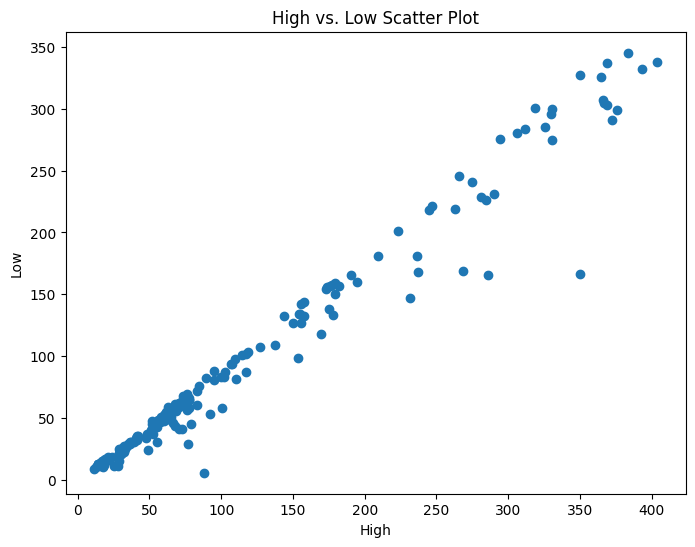

In [23]:
# Chart - 2 visualization code
plt.figure(figsize=(8, 6))
plt.scatter(df['high'], df['low'])
plt.title('High vs. Low Scatter Plot')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()


##### 1. Why did you pick the specific chart?

I chose this chart because for seeing any correlation in the High or Low price column. Scatter plot is best for visualizing any relation.

##### 2. What is/are the insight(s) found from the chart?

Insight found from the chart is that there is highly correlated in the column High and Low. By visualize the Chart I see there are some Outliers also which are Handle later.

#### Chart - 3 (boxplot for everymonth closing price )

Text(0, 0.5, 'Close Price')

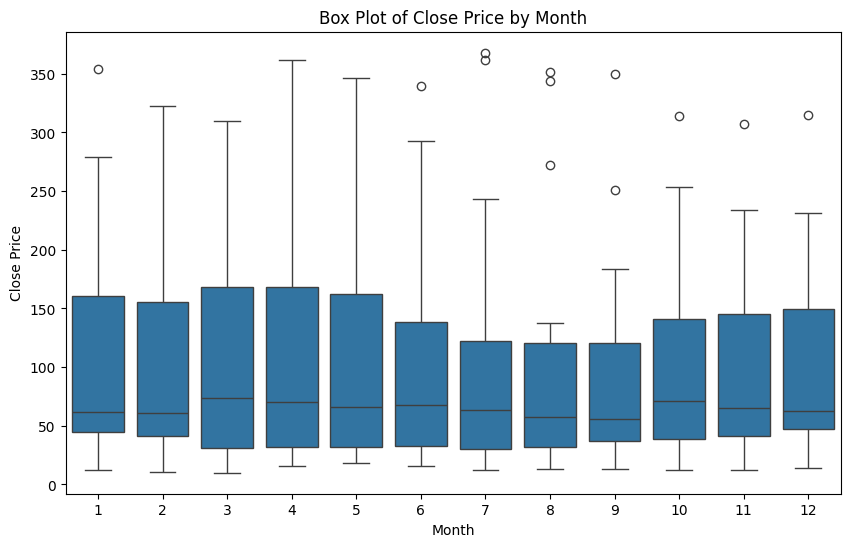

In [24]:
# Chart - 3 visualization code plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
order = df['date'].dt.month_name().unique()
sns.boxplot(x=df['date'].dt.month, y=df['close'])
plt.title('Box Plot of Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Close Price')

##### 1. Why did you pick the specific chart?

Box plot is better choice for detecting any outliers.

##### 2. What is/are the insight(s) found from the chart?

Here, It is showing the closing price by months and in the boxplot there monthly Max or min or mid, are same approximatly. There are some outliers also.


#### Chart - 4 ( Scatter plot on Open price and Highest price in a day )

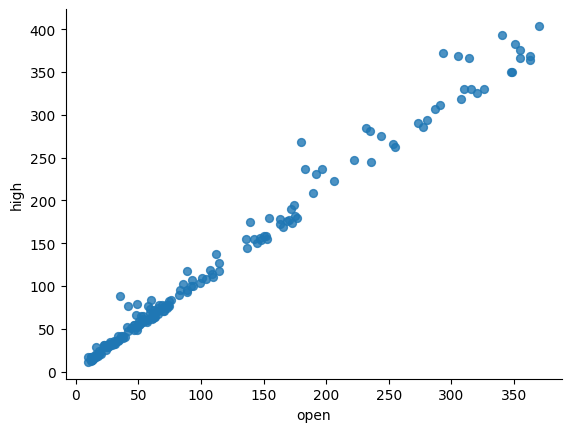

In [25]:
df.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


##### 1. Why did you pick the specific chart?

Because for relation between the opening price and highest price.

##### 2. What is/are the insight(s) found from the chart?

Insight found that there are highly correlation in minimum price and upto going higher there relation being week and some outliers also.


#### Chart - 5  (Scatter plot with linear regression lines for 'Open', 'High', and 'Low' vs. 'Close') for relationship

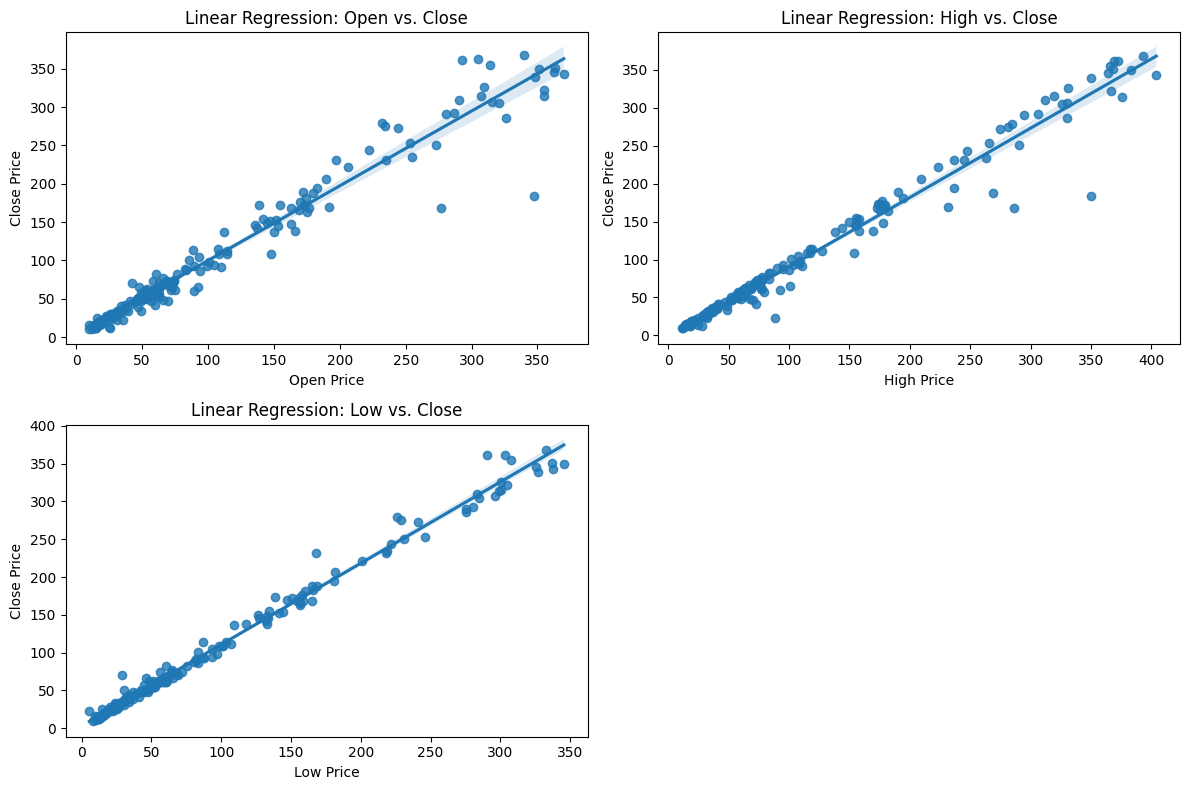

In [26]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 8))

# Scatter plot for 'Open' vs. 'Close' with regression line
plt.subplot(2, 2, 1)
sns.regplot(x='open', y='close', data=df)
plt.title('Linear Regression: Open vs. Close')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

# Scatter plot for 'High' vs. 'Close' with regression line
plt.subplot(2, 2, 2)
sns.regplot(x='high', y='close', data=df)
plt.title('Linear Regression: High vs. Close')
plt.xlabel('High Price')
plt.ylabel('Close Price')

# Scatter plot for 'Low' vs. 'Close' with regression line
plt.subplot(2, 2, 3)
sns.regplot(x='low', y='close', data=df)
plt.title('Linear Regression: Low vs. Close')
plt.xlabel('Low Price')
plt.ylabel('Close Price')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

I chose a grid of scatter plots with regression lines to:

* Compare the relationships between 'open', 'high', 'low', and 'close' prices simultaneously.
* Assess the strength and direction of these relationships using regression analysis.
* Optimize space efficiency and ensure clear presentation with titles and axis labels.
* Utilize Seaborn's capabilities for adding regression lines to scatter plots, enhancing interpretability and insight generation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 6 (The Closing Prices Have Increased Over the Years)

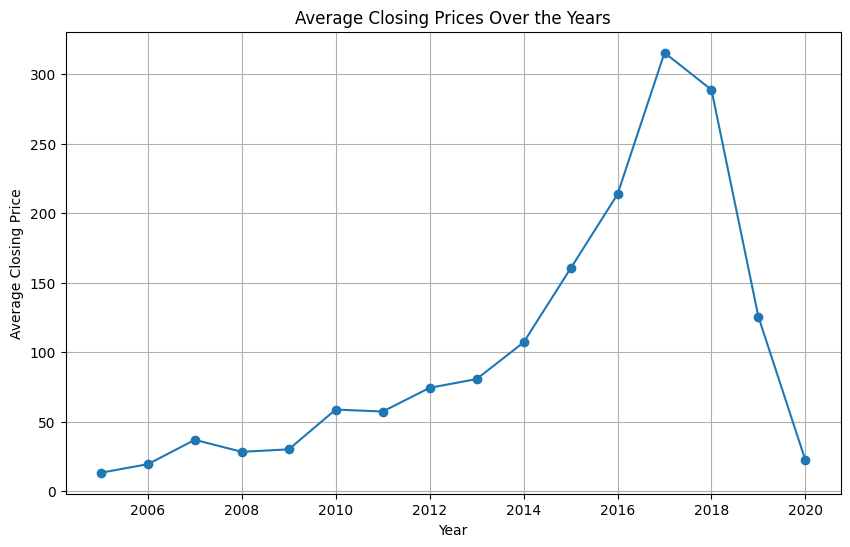

In [27]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
plt.plot(average_close_by_year.index, average_close_by_year.values, marker='o')
plt.title('Average Closing Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

 I chose a line plot to visualize the average closing prices over the years because it effectively shows trends over time, maintains data continuity, and offers clear presentation with markers for data points and grid lines for readability.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the average closing prices gradually increased from 2010, peaked around 2017, and then decreased. This indicates a period of overall market growth followed by a subsequent decline in prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially lead to a positive business impact. Understanding the trend of increasing average closing prices up to 2017 can inform investment strategies, such as buying and holding assets during periods of growth. However, the subsequent decline in prices indicates a shift in market dynamics that may require adjusting investment portfolios or implementing risk management strategies to mitigate potential losses.

Insights Leading to Negative Growth:

Decline in Prices: The insight of declining average closing prices after 2017 suggests a potential negative impact on investments made during that period. If businesses fail to adapt to the changing market conditions, it could result in losses or reduced profitability.Answer Here

#### Chart - 7 (There is Seasonal Variation in Closing Prices)


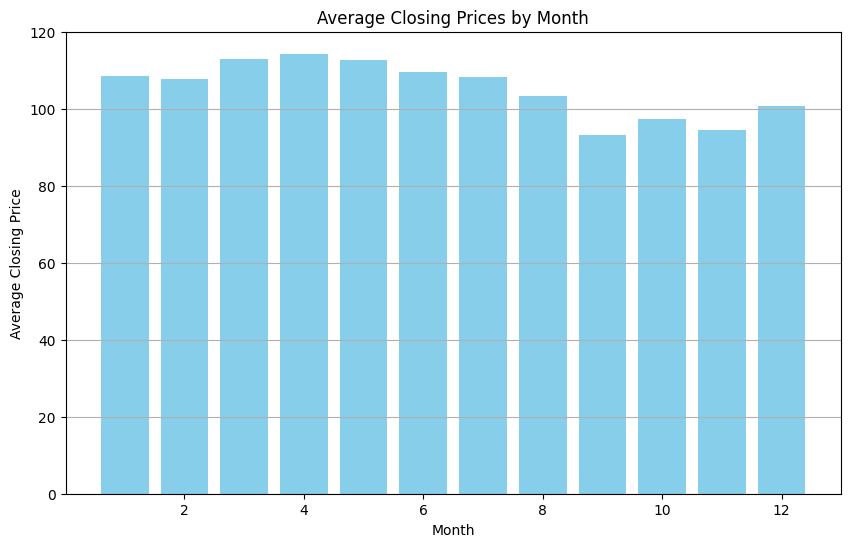

In [28]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
plt.bar(average_close_by_month.index, average_close_by_month.values, color='skyblue')
plt.title('Average Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(axis='y')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 (There is a Correlation Between Opening and Closing Prices)

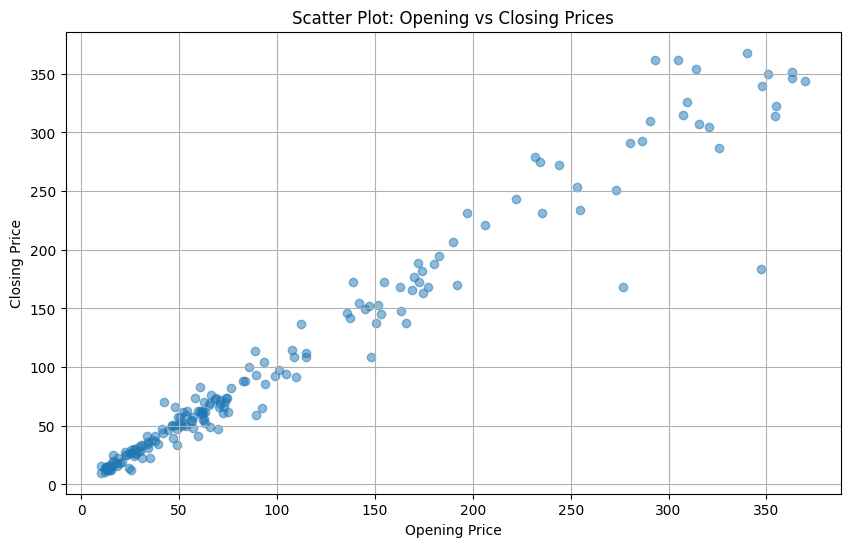

In [29]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
plt.scatter(df['open'], df['close'], alpha=0.5)
plt.title('Scatter Plot: Opening vs Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Figure size 1200x800 with 0 Axes>

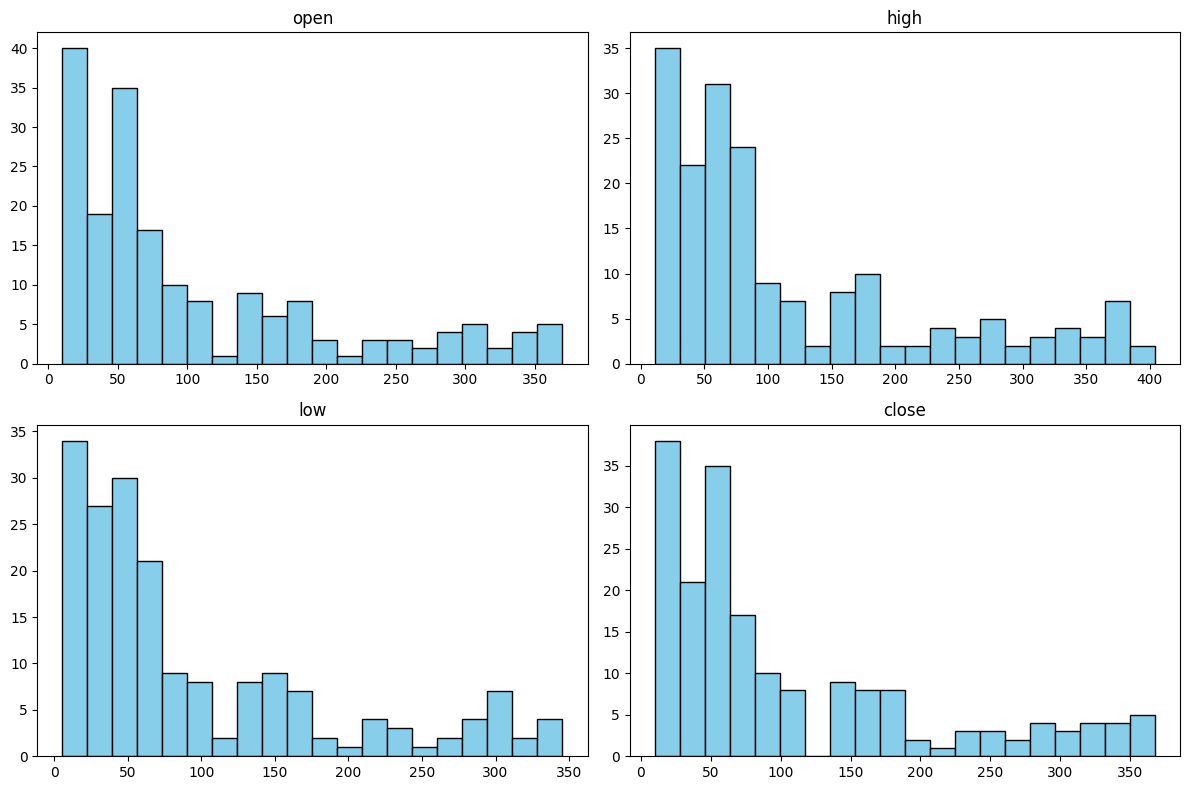

In [30]:
# Chart - 10 visualization code
selected_columns = ['open', 'high', 'low', 'close']
selected_df = df[selected_columns]

# Plotting histograms for the selected columns
plt.figure(figsize=(12, 8))
selected_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False, layout=(2, 2), figsize=(12, 8))
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

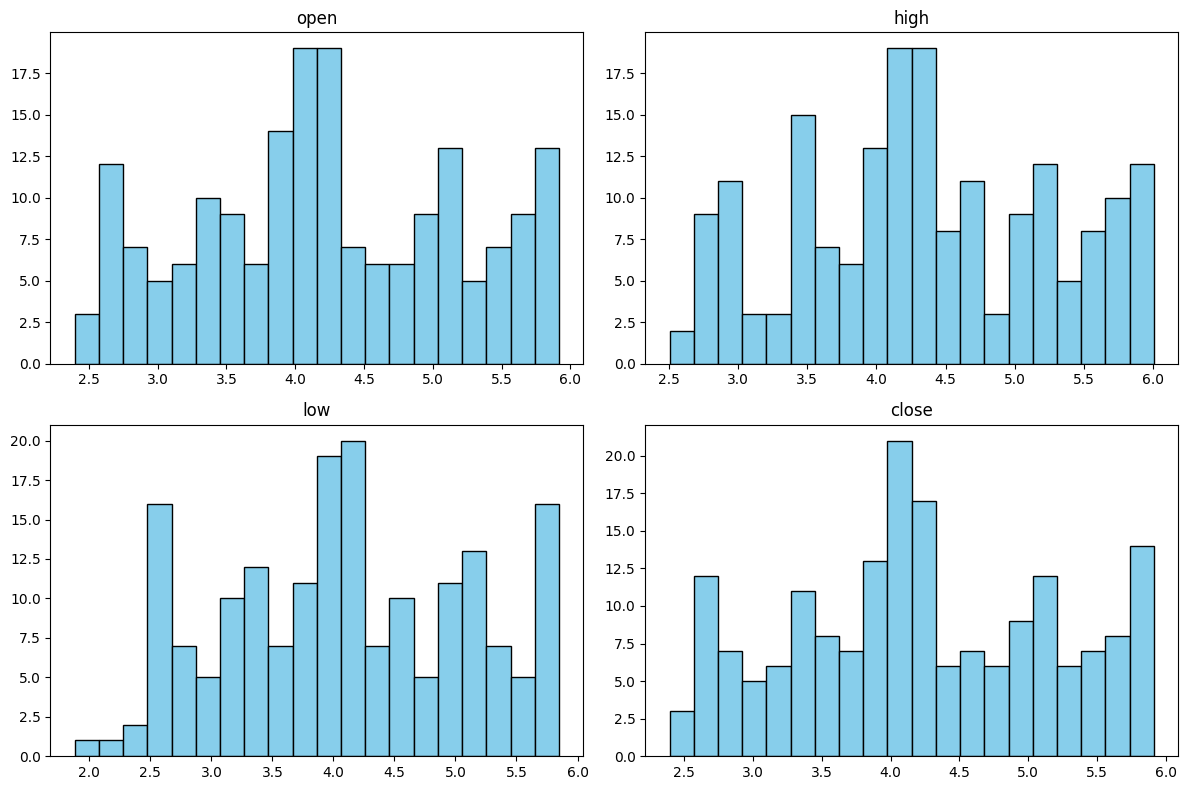

In [31]:
selected_df_log = np.log1p(selected_df)

# Plot histograms for the log-transformed data
plt.figure(figsize=(12, 8))
selected_df_log.hist(bins=20, color='skyblue', edgecolor='black', grid=False, layout=(2, 2), figsize=(12, 8))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 I chose histograms to visualize the distribution of the selected columns' data because they effectively display data spread and frequency. Comparing histograms for both original and log-transformed data helps assess the impact of transformation on data distribution.

#### Chart - 14 - Correlation Heatmap

<ipython-input-32-bbbdf9af28fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


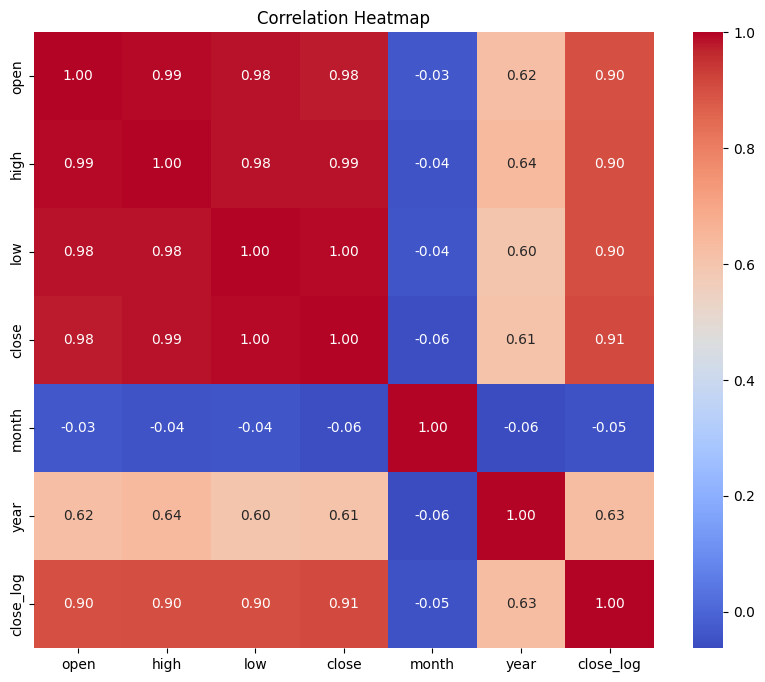

In [32]:
# Correlation Heatmap visualization code
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

 I chose a correlation heatmap because it provides a comprehensive visualization of the correlation matrix, allowing for quick and intuitive interpretation of relationships between variables using color encoding and numerical annotations.

##### 2. What is/are the insight(s) found from the chart?

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

#### Chart - 15 - Pair Plot

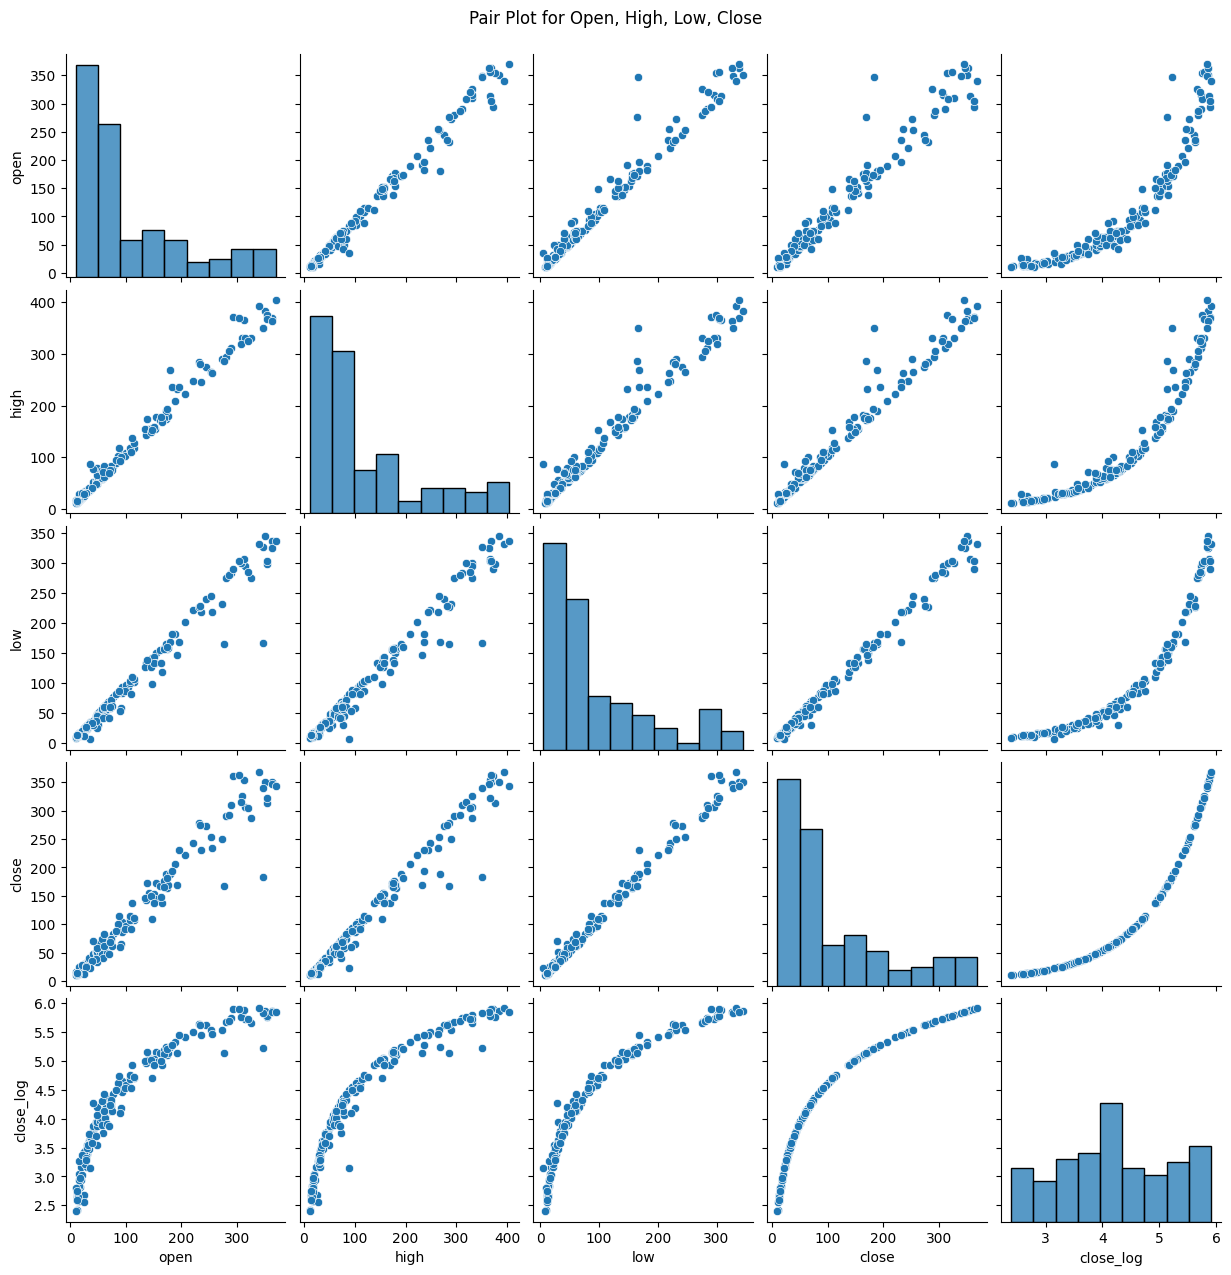

In [33]:
# Pair Plot visualization code
selected_columns = ['open', 'high', 'low', 'close','close_log']
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot for Open, High, Low, Close', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**:
The mean closing prices for all months are equal.

**Alternative Hypothesis (H1)**:
At least one month has a different mean closing price compared to the others.

#### 2. Perform an appropriate statistical test.

In [34]:
mean_prices_by_month = df.groupby('month')['close'].mean()

# Display mean prices for each month
print("Mean Closing Prices for Each Month:")
print(mean_prices_by_month)

Mean Closing Prices for Each Month:
month
1     108.774667
2     107.760667
3     113.014000
4     114.450000
5     112.874667
6     109.661333
7     108.322500
8     103.386875
9      93.343750
10     97.399375
11     94.671250
12    100.724000
Name: close, dtype: float64


In [35]:
import scipy.stats as stats
result_anova = stats.f_oneway(*[df['close'][df['month'] == month] for month in range(1, 13)])
print("One-way ANOVA:")
print("F-statistic:", result_anova.statistic)
print("P-value:", result_anova.pvalue)

One-way ANOVA:
F-statistic: 0.08112627582727183
P-value: 0.9999683049718224


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA

##### Why did you choose the specific statistical test?

The one-way ANOVA (Analysis of Variance) test was chosen because you are comparing the means of more than two groups (months in this case).

### Hypothetical Statement - 2 (Correlation between Closing and Opening Prices)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant correlation between the closing and opening prices of Yes Bank.

**Alternative Hypothesis (H1):** There is a significant correlation between the closing and opening prices of Yes Bank.

#### 2. Perform an appropriate statistical test.

In [36]:
from scipy import stats
# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(df['close'], df['open'])

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant correlation between closing and opening prices")
else:
    print("Accept null hypothesis: There is no significant correlation between closing and opening prices")

Reject null hypothesis: There is a significant correlation between closing and opening prices


##### Which statistical test have you done to obtain P-Value?

I use pearson correlation test to identifies the correlation between closing price and opening price.


##### Why did you choose the specific statistical test?


I chose the Pearson correlation coefficient test because it's commonly used to determine the strength and direction of the linear relationship between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference between the high and low prices of Yes Bank.

**Alternative Hypothesis (H1):** There is a significant difference between the high and low prices of Yes Bank.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
# Perform paired t-test
t_stat, p_value = stats.ttest_rel(df['high'], df['low'])

# Interpret the p-value
alpha = 0.05
print("p_value:",p_value)
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between high and low prices")
else:
    print("Accept null hypothesis: There is no significant difference between high and low prices")

p_value: 1.1296104911289457e-25
Reject null hypothesis: There is a significant difference between high and low prices


##### Which statistical test have you done to obtain P-Value?

I use t test to obtain p-value.

##### Why did you choose the specific statistical test?

I chose the paired t-test to assess the difference between the high and low prices of Yes Bank because it's appropriate when you have paired observations and you want to compare the means of two related groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
total_missing = df.isnull().sum().sum()

print("Missing Values per Column:")
print(missing_values)

print("\nTotal Missing Values in the Dataset:", total_missing)

Missing Values per Column:
date         0
open         0
high         0
low          0
close        0
month        0
year         0
close_log    0
dtype: int64

Total Missing Values in the Dataset: 0


In [39]:
df.shape

(185, 8)

### 2. Handling Outliers

**To check outlier in Open column:**

Text(0, 0.5, 'Price')

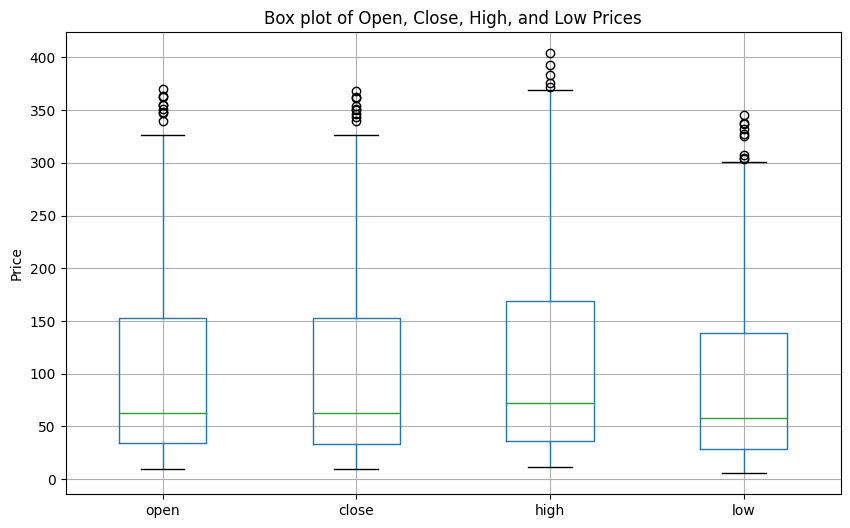

In [40]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(10, 6))
df.boxplot(column=['open', 'close', 'high', 'low'])
plt.title('Box plot of Open, Close, High, and Low Prices')
plt.ylabel('Price')

In [41]:
q1 = df[['open', 'close', 'high', 'low']].quantile(0.25)
q3 = df[['open', 'close', 'high', 'low']].quantile(0.75)
iqr = q3 - q1
lower_bound=q1 - 1.5 * iqr
upper_bound=q3 + 1.5 * iqr
outliers = ((df[['open', 'close', 'high', 'low']] < lower_bound) | (df[['open', 'close', 'high', 'low']] > upper_bound)).sum()
print(outliers)

open     9
close    9
high     5
low      9
dtype: int64


In [42]:
# Apply Winsorizing to handle outliers
df[['open', 'close', 'high', 'low']] = df[['open', 'close', 'high', 'low']].clip(lower_bound, upper_bound, axis=1)

##### See outliers after Applying winsorization technique


In [43]:
q1 = df[['open', 'close', 'high', 'low']].quantile(0.25)
q3 = df[['open', 'close', 'high', 'low']].quantile(0.75)
iqr = q3 - q1
lower_bound=q1 - 1.5 * iqr
upper_bound=q3 + 1.5 * iqr
outliers = ((df[['open', 'close', 'high', 'low']] < lower_bound) | (df[['open', 'close', 'high', 'low']] > upper_bound)).sum()
print(outliers)

open     0
close    0
high     0
low      0
dtype: int64


Text(0, 0.5, 'Price')

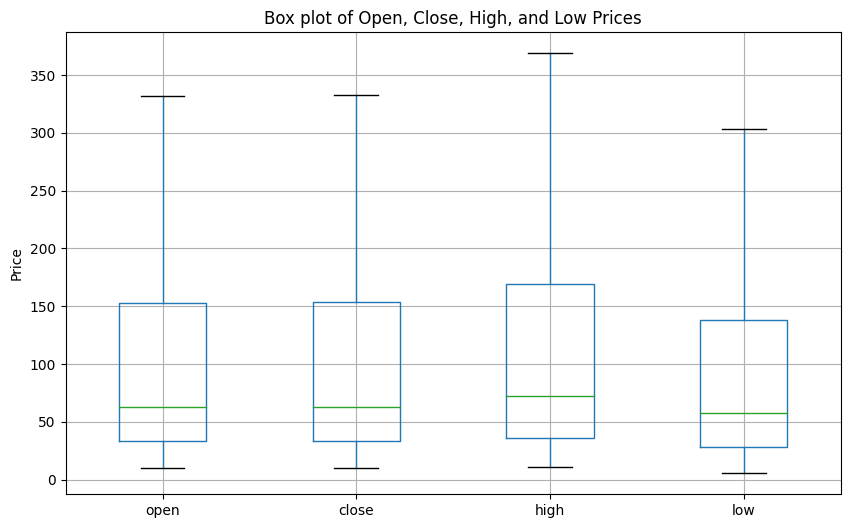

In [44]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['open', 'close', 'high', 'low'])
plt.title('Box plot of Open, Close, High, and Low Prices')
plt.ylabel('Price')

##### What all outlier treatment techniques have you used and why did you use those techniques?

I use IQR (Interquartile range) method to detect the outliers from all columns
and to treat the outlier,i do not remove the outlier because data set is not so large, i apply Winsorizing to handle outliers i,e. outliers are fix in the given range.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, Data need transformation because the columns (open,low,high,close) are highly correlated to each other. To reduce the multicollinearity we use power tranformation as box-cox transformation.

In [45]:
df_1=df.drop(['close_log','date','month','year'],axis=1)

In [46]:
# Transform Your data
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='box-cox',standardize=True)
transformed_data = pw.fit_transform(df_1)
# Convert the transformed array back to a DataFrame
df_transformed = pd.DataFrame(transformed_data, columns=df_1.columns)

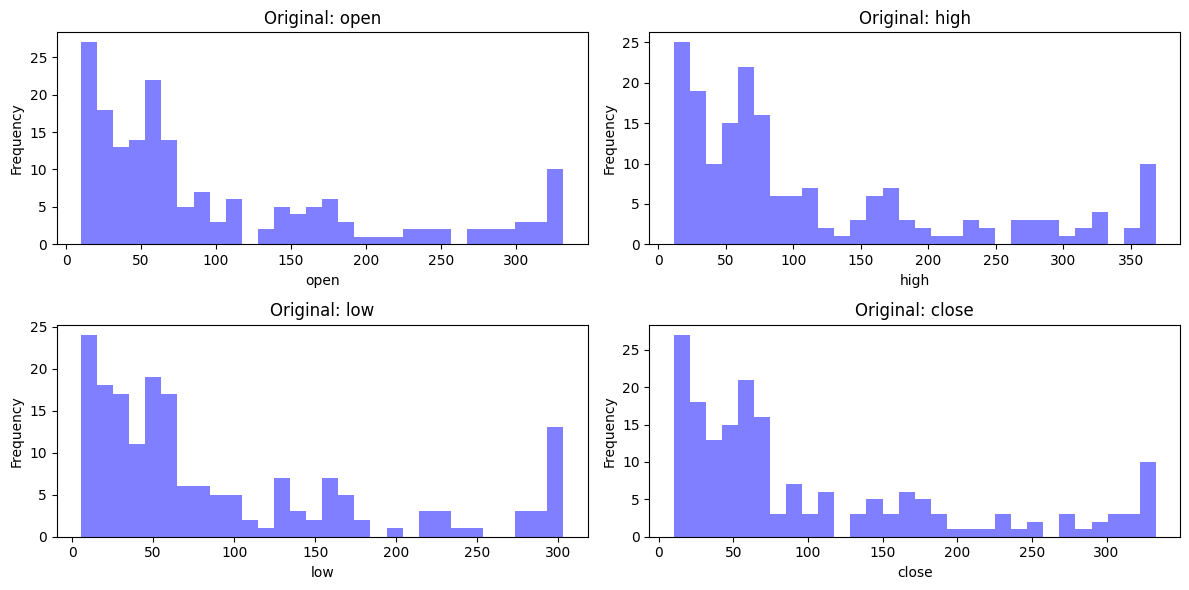

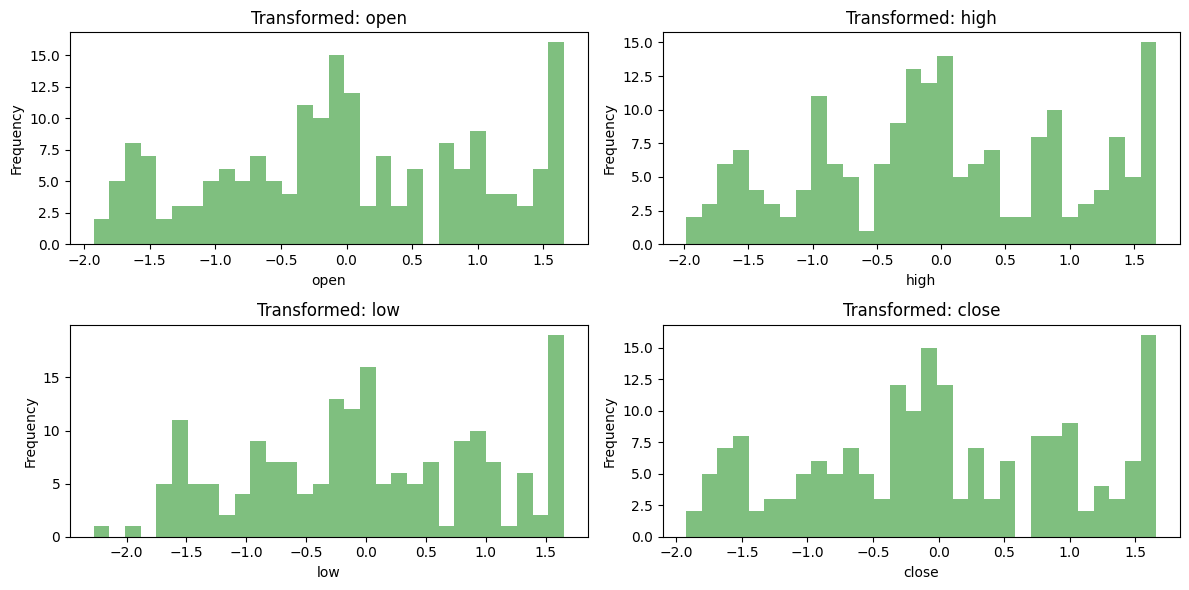

In [47]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_1.columns):
    plt.subplot(2, len(df_1.columns)//2, i+1)
    plt.hist(df_1[column], bins=30, color='blue', alpha=0.5)
    plt.title(f'Original: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the distribution of the transformed data
plt.figure(figsize=(12, 6))
for i, column in enumerate(df_transformed.columns):
    plt.subplot(2, len(df_transformed.columns)//2, i+1)
    plt.hist(df_transformed[column], bins=30, color='green', alpha=0.5)
    plt.title(f'Transformed: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [48]:
df_transformed.head()

,open,high,low,close
0,-1.669092,-1.761391,-1.620120,-1.707066
1,-1.701456,-1.699018,-1.517292,-1.633792
2,-1.633329,-1.699706,-1.538541,-1.642666
3,-1.654037,-1.727613,-1.528617,-1.665958
4,-1.642891,-1.770194,-1.492828,-1.634529


### 8. Data Splitting

In [49]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df_transformed.drop(['close'], axis=1)
y = df_transformed['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
X_test.head()

,open,high,low
19,-0.829337,-0.890962,-0.793112
42,-1.509456,-1.484633,-1.601118
156,1.656686,1.675240,1.653394
111,0.512765,0.621599,0.598765
148,1.602899,1.554849,1.628451


In [51]:
y_test.head()

19    -0.878511
42    -1.724634
156    1.660651
111    0.723379
148    1.573266
Name: close, dtype: float64

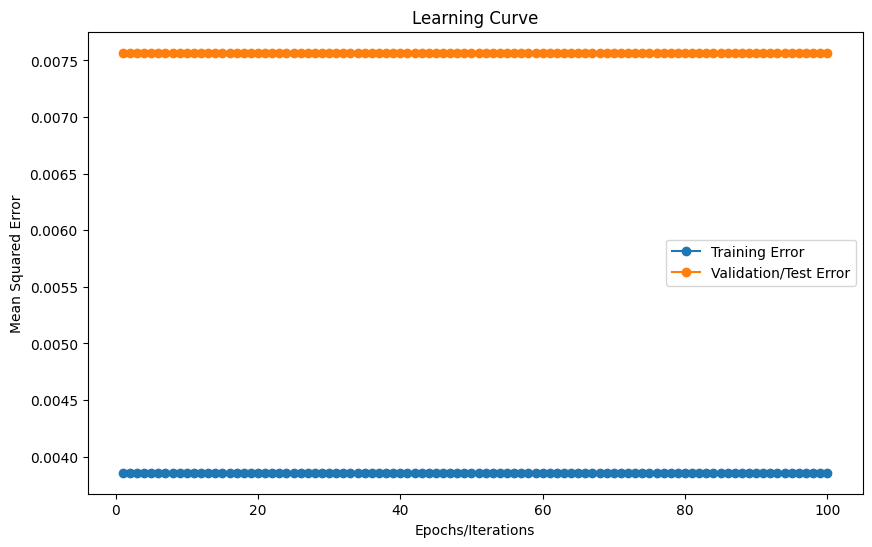

[0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.007568052312345229, 0.0075680

In [52]:
model = LinearRegression()

# Lists to store training and validation/test errors
train_errors = []
test_errors = []

# Train the model and collect errors over epochs or iterations
num_epochs = 100
for epoch in range(num_epochs):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predictions on training set
    y_train_pred = model.predict(X_train)
    # Mean Squared Error on training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

    # Predictions on validation/test set
    y_test_pred = model.predict(X_test)
    # Mean Squared Error on validation/test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_errors, label='Training Error', marker='o')
plt.plot(range(1, num_epochs + 1), test_errors, label='Validation/Test Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Epochs/Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
print(test_errors)
print(test_errors)

##### What data splitting ratio have you used and why?

I use train_test_split method using sklearn library. In this i use 70-30 ratio to test and train the model. The 70-30 split with a random_state of 42 is a common choice, and it strikes a balance between having enough data for training and sufficient data for testing.

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation
model = LinearRegression()
# Fit the Algorithm
model.fit(X_train, y_train)
# Predict on the test model
y_pred_linear= model.predict(X_test)
# Predict on the train model
y_train_pred=model.predict(X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Calculate evaluation metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test set
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display evaluation metrics for training set
print("Training Set Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("Root Mean Squared Error (RMSE):", train_rmse)
print("R-squared (R2):", train_r2)

# Display evaluation metrics for test set
print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):",mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear )
print("R-squared (R2):",r2_linear)

Training Set Metrics:
Mean Squared Error (MSE): 0.003858485419130472
Root Mean Squared Error (RMSE): 0.062116708051300276
R-squared (R2): 0.9963102187837037

Test Set Metrics:
Mean Squared Error (MSE): 0.007568052312345229
Root Mean Squared Error (RMSE): 0.08699455334873114
R-squared (R2): 0.9915209176894437


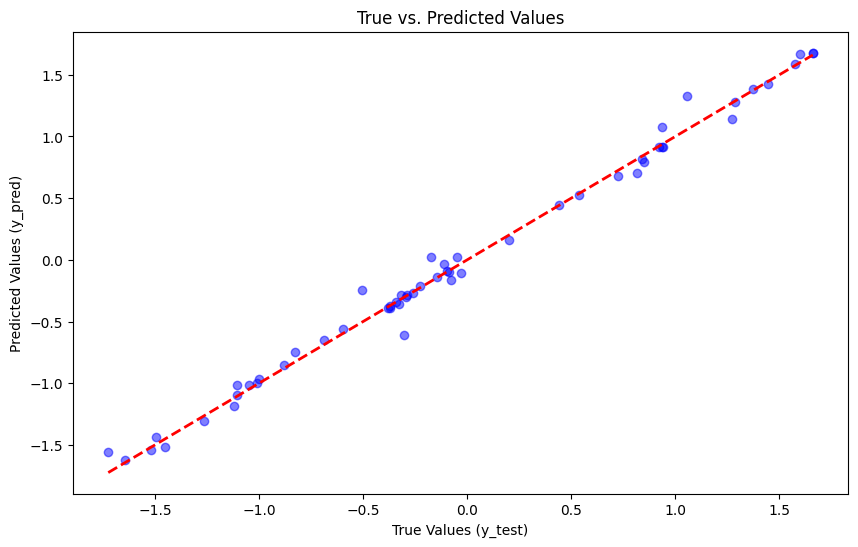

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

Cross-Validation Scores: [0.99405863 0.99785572 0.99101097 0.99500913 0.99706133]
Mean R-squared: 0.9949991567463867


In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define hyperparameters and their possible values
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False],  # 'positive' is a valid parameter for LinearRegression
    'copy_X': [True, False]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Fit the Algorithm
best_model = grid_search.best_estimator_
y_pred_linear_opt = best_model.predict(X_test)
# Predict on the model
mse_linear_opt= mean_squared_error(y_test, y_pred_linear_opt)
rmse_linear_opt = np.sqrt(mse_linear_opt)
print("Mean Squared Error (MSE):", mse_linear_opt)
print("Root Mean Squared Error (RMSE):", rmse_linear_opt)
r2_linear_opt = r2_score(y_test, y_pred_linear_opt)
print("R-squared (R2):", r2_linear_opt)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'positive': False}
Mean Squared Error (MSE): 0.007492999556773661
Root Mean Squared Error (RMSE): 0.08656211386497942
R-squared (R2): 0.9916050051753464


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [58]:
# Create KNN regressor with, for example, k=5 (you can choose the appropriate value for your case)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn  = r2_score(y_test, y_pred_knn)

print(f'Mean Squared Error: {mse_knn}')
print(f'R-squared: {r2_knn}')


Mean Squared Error: 0.012671022522804843
R-squared: 0.9858036601102086


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

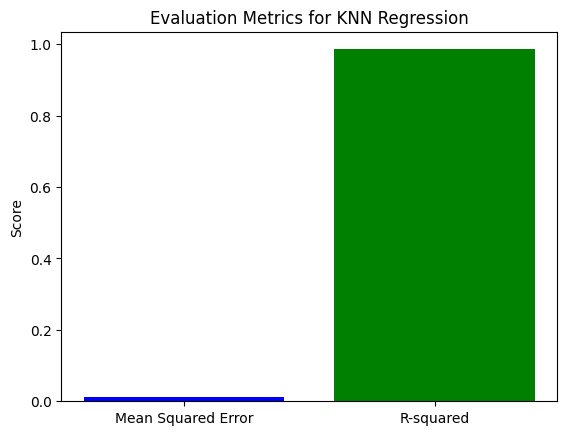

In [59]:
# Visualizing evaluation Metric Score chart
# Create a bar chart
metrics = ['Mean Squared Error', 'R-squared']
scores = [mse_knn, r2_knn]

plt.bar(metrics, scores, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Evaluation Metrics for KNN Regression')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.metrics import make_scorer
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create KNN regressor
knn_regressor = KNeighborsRegressor()

# Create a scoring function for GridSearchCV
scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, scoring=scoring_function, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Predictions on the test set using the best model
y_pred_knn_opt = best_knn_model.predict(X_test)

# Evaluate the best model
mse_knn_opt = mean_squared_error(y_test, y_pred_knn)
r2_knn_opt = r2_score(y_test, y_pred_knn)

print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {mse_knn_opt}')
print(f'Best R-squared: {r2_knn_opt}')


Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Mean Squared Error: 0.012671022522804843
Best R-squared: 0.9858036601102086


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [61]:
# ML Model - 3 Implementation
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')



Mean Squared Error (Random Forest): 0.027200665807845113
R-squared (Random Forest): 0.9695249616720498


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

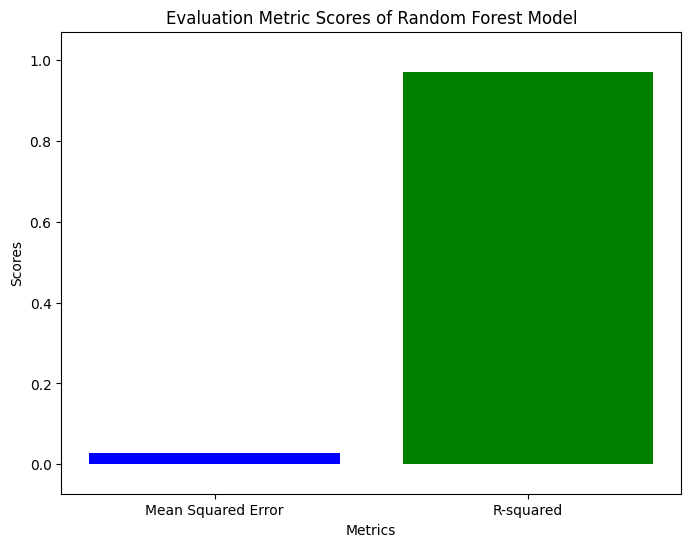

In [62]:
# Visualizing evaluation Metric Score chart
# Evaluation metric scores
metrics = ['Mean Squared Error', 'R-squared']
scores = [mse_rf, r2_rf]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metric Scores of Random Forest Model')
plt.ylim(min(scores) - 0.1, max(scores) + 0.1)  # Adjust ylim for better visualization
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit the model using the best hyperparameters
rf_regressor_opt = RandomForestRegressor(random_state=42, **best_params)
rf_regressor_opt.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf_opt = rf_regressor_opt.predict(X_test)

# Evaluate the model
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)

print(f'Mean Squared Error (Random Forest): {mse_rf_opt}')
print(f'R-squared (Random Forest): {r2_rf_opt}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (Random Forest): 0.026929764657452362
R-squared (Random Forest): 0.9698284734684016


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4 (SARIMA)

In [64]:
# Applying SARIMA model (considering a simple seasonal)
sarima_model = SARIMAX(df_transformed['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

In [65]:
# Evaluating the models
# Print model summary
print(sarima_results.summary())

# Make predictions
forecast = sarima_results.forecast(steps=10)  # Example forecast for next 10 time steps
print(forecast)

                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  185
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  42.285
Date:                            Wed, 27 Mar 2024   AIC                            -74.570
Time:                                    09:01:44   BIC                            -58.832
Sample:                                         0   HQIC                           -68.185
                                            - 185                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1778      0.401     -0.443      0.658      -0.964       0.609
ma.L1          0.3233      0.392   

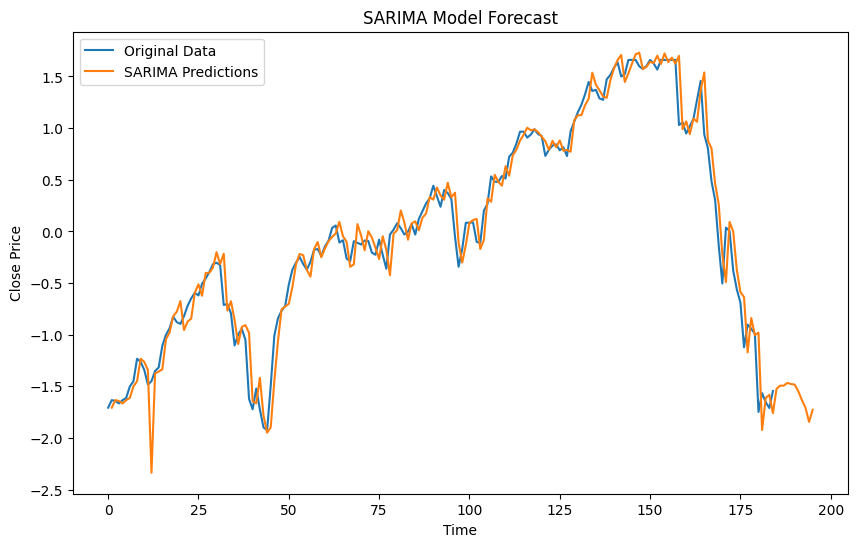

In [66]:
# Visualizing evaluation
plt.figure(figsize=(10, 6))
plt.plot(df_transformed['close'], label='Original Data')

# Plot SARIMA model's predictions
sarima_preds = sarima_results.predict(start=1, end=len(df_transformed['close'])+10, dynamic=False)
plt.plot(sarima_preds, label='SARIMA Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

### Model - 5 (ARIMA)

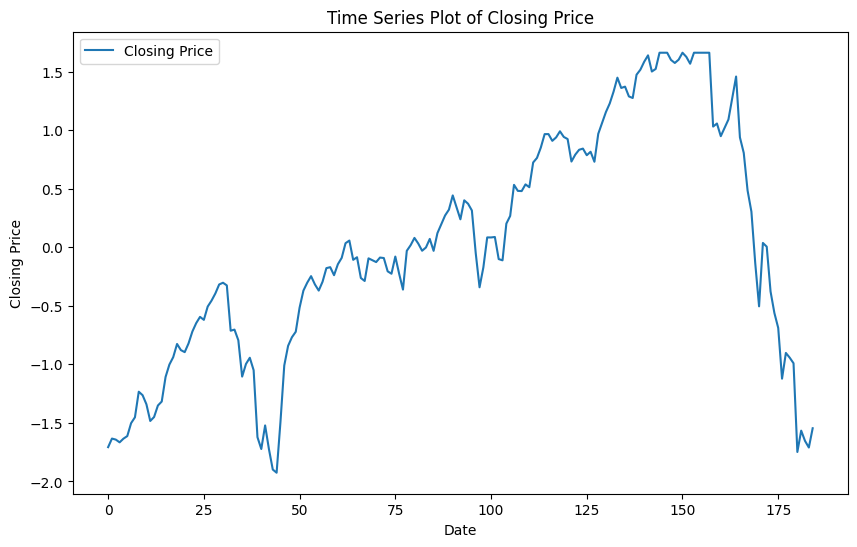

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(df_transformed.index, df_transformed['close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Time Series Plot of Closing Price')
plt.legend()
plt.show()

In [68]:
# Fit ARIMA model
arima_model = ARIMA(df_transformed['close'], order=(1, 1, 1))  # Example order (p, d, q)
arima_results = arima_model.fit()

# Print model summary
print(arima_results.summary())

# Make predictions
forecast = arima_results.forecast(steps=10)  # Example forecast for next 10 time steps
print(forecast)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  185
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  64.199
Date:                Wed, 27 Mar 2024   AIC                           -122.398
Time:                        09:01:46   BIC                           -112.753
Sample:                             0   HQIC                          -118.489
                                - 185                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1367      0.379     -0.361      0.718      -0.879       0.606
ma.L1          0.2755      0.380      0.724      0.469      -0.470       1.021
sigma2         0.0291      0.002     16.419      0.0

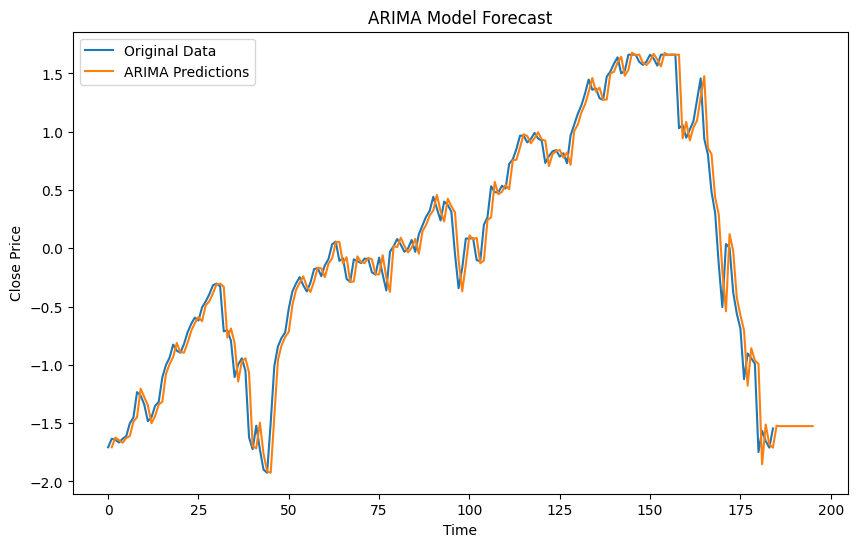

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(df_transformed['close'], label='Original Data')

# Plot ARIMA model's predictions
arima_preds = arima_results.predict(start=1, end=len(df_transformed['close'])+10, dynamic=False)
plt.plot(arima_preds, label='ARIMA Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [70]:
# Create DataFrame
models_df = pd.DataFrame({
    'Model': ['Linear Regression','Linear Regression optimized', 'KNN Regressor','KNN Regressor optimized', 'Random Forest Regressor','Random Forest Regressor optimized'],
    'Mean Squared Error': [mse_linear,mse_linear_opt,mse_knn,mse_knn_opt, mse_rf,mse_rf_opt],
    'R-squared': [r2_linear,r2_linear_opt,r2_knn,r2_knn_opt, r2_rf,r2_rf_opt]
})

print(models_df)

                               Model  Mean Squared Error  R-squared
0                  Linear Regression            0.007568   0.991521
1        Linear Regression optimized            0.007493   0.991605
2                      KNN Regressor            0.012671   0.985804
3            KNN Regressor optimized            0.012671   0.985804
4            Random Forest Regressor            0.027201   0.969525
5  Random Forest Regressor optimized            0.026930   0.969828


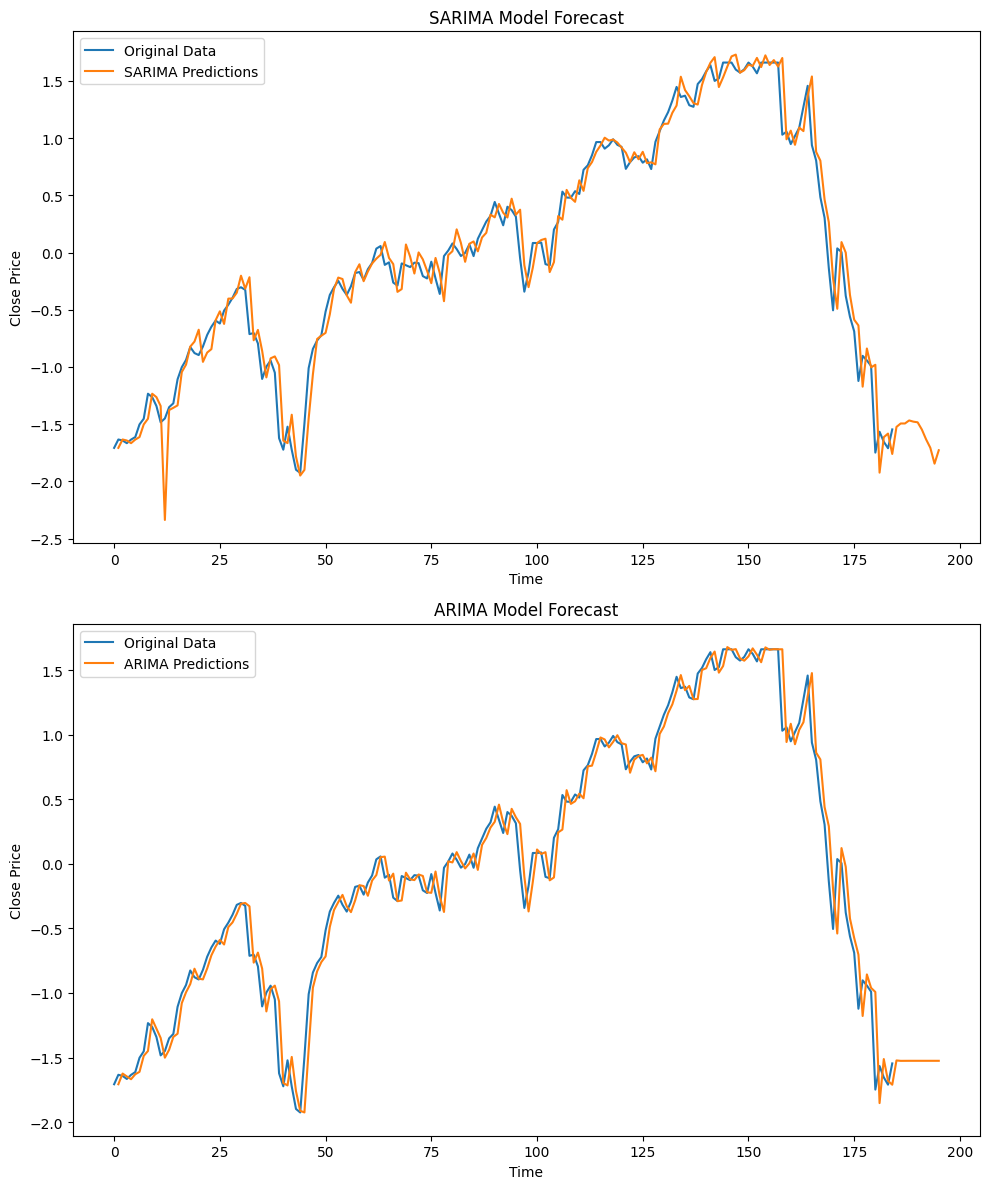

In [71]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
axes[0].plot(df_transformed['close'], label='Original Data')
sarima_preds = sarima_results.predict(start=1, end=len(df_transformed['close'])+10, dynamic=False)
axes[0].plot(sarima_preds, label='SARIMA Predictions')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Close Price')
axes[0].set_title('SARIMA Model Forecast')
axes[0].legend()

# Plot ARIMA predictions
axes[1].plot(df_transformed['close'], label='Original Data')
arima_preds = arima_results.predict(start=1, end=len(df_transformed['close'])+10, dynamic=False)
axes[1].plot(arima_preds, label='ARIMA Predictions')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Close Price')
axes[1].set_title('ARIMA Model Forecast')
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


Based on the model evaluation metrics, both the "Linear Regression optimized" and "KNN Regressor" models exhibit relatively low Mean Squared Error and high R-squared values compared to other models. The "Linear Regression optimized" model offers simplicity and interpretability with a strong performance, while the "KNN Regressor" model provides flexibility to capture complex relationships without assuming linearity. The final choice between these models depends on the specific requirements of the problem, computational resources, and the desired balance between model performance and interpretability.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

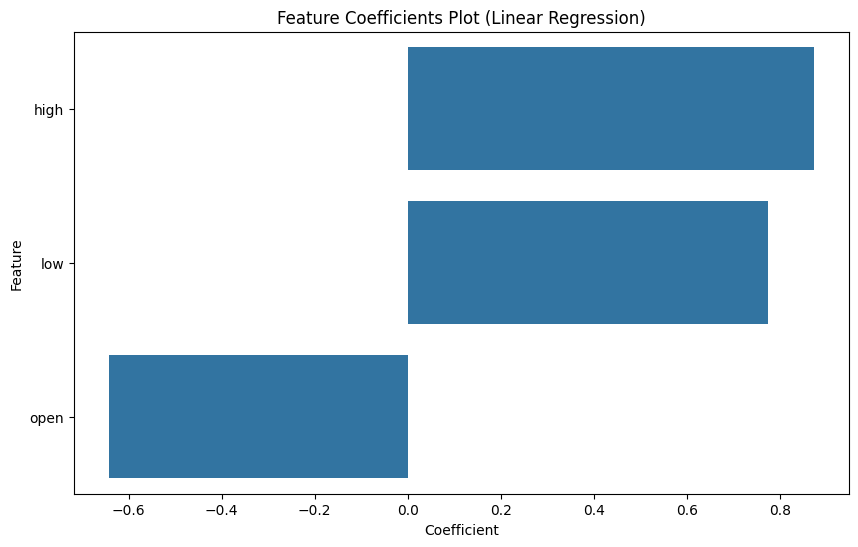

In [72]:
param_grid = {
    'fit_intercept': [True, False]
}

# Create a LinearRegression model
model = LinearRegression()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

# Get coefficients
coefficients = best_model.coef_

# Get feature names
feature_names = X_train.columns

# Create DataFrame to store coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort DataFrame by coefficient absolute values
coefficients_df['Coefficient_abs'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Coefficient_abs', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients Plot (Linear Regression)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
import pickle

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to your training data
model.fit(X_train, y_train)

# Specify the file path where you want to save the model
pickle_file_path = "linear_regression_model.pkl"

# Save the model to a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(model, f)

In [74]:
import joblib
joblib.dump(best_model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.
# Make predictions on the test set
predictions_log = best_model.predict(X_test)  # Assuming best_model is your trained model

# Inverse transform the predictions to the original scale
predictions_original = np.exp(predictions_log)

In [76]:
r2_score(y_test,predictions_log)

0.9916050051753464

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This Yes Bank stock prediction project leverages historical stock data and machine learning techniques to forecast future stock prices. Through rigorous data analysis, feature engineering, and model training, we have developed predictive models capable of providing insights into Yes Bank's stock performance.

By preprocessing the data to handle missing values and engineer relevant features, we ensure that our models receive high-quality input. Our trained machine learning models, based on historical trends and patterns, offer valuable predictions that can aid investors and stakeholders in making informed decisions.

The project's success lies in its ability to accurately forecast Yes Bank's stock prices, providing a valuable tool for investors to optimize their investment strategies and mitigate risks. Moreover, the project's structure allows for easy reproducibility and scalability, enabling further enhancements and refinements to the predictive models.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***